<a href="https://colab.research.google.com/github/kwanqing/CMPE-257-Fall23-Jeffrey-Ong/blob/class_activities/LinearRegressionComplete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

## Generates N random points for logistic regression on a line w
def generate_lr(N=20,w0=0,w1=1):
    n = 0
    X1 = []
    Y = []
    while(n < N):
        x1 = random.uniform(-10,10)
        x2 = random.uniform(-1,1)
        y = w0 + w1*x1 + x2
        X1.append(x1)
        Y.append(y)
        n += 1
    data = [np.array([1,X1[i],Y[i]]) for i in range(N)]
    return data

In [4]:
f_w0, f_w1 = 1, 1
N = 50
data = generate_lr(N, f_w0, f_w1)

In [32]:
def abline(slope, intercept, label=None, color='b'):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--', label=label, c=color)

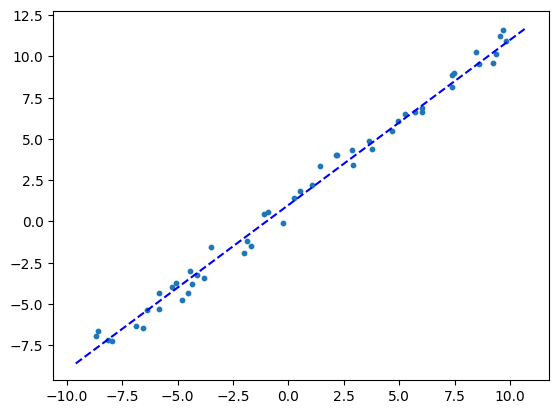

In [33]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
markers = [] #'o' or '+'
colors = [] # 'b' or 'r'
cnt = 0
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
plt.show()

In [9]:
X = [[i[0], i[1]] for i in data]
Y  = [i[2] for i in data]

In [11]:
XtX = np.matmul(np.transpose(X), X)
XtX.shape

(2, 2)

In [13]:
XtX_inv = np.linalg.inv(XtX)
XtX_inv.shape, XtX_inv

((2, 2),
 array([[ 0.0201866 , -0.00033579],
        [-0.00033579,  0.00060427]]))

In [14]:
X_pi = np.matmul(XtX_inv, np.transpose(X))
X_pi

array([[ 1.92143021e-02,  2.17155768e-02,  2.21558225e-02,
         1.94643316e-02,  1.98254143e-02,  1.89692781e-02,
         2.16727136e-02,  1.68874846e-02,  1.81618500e-02,
         1.76735131e-02,  1.69763470e-02,  2.23851156e-02,
         2.24953824e-02,  1.81663863e-02,  1.97072447e-02,
         1.73067050e-02,  1.69415807e-02,  2.08217880e-02,
         2.23291209e-02,  1.77156163e-02,  1.94444751e-02,
         2.04948148e-02,  2.14691363e-02,  2.13613574e-02,
         2.02646278e-02,  1.86175970e-02,  2.07550255e-02,
         2.19570858e-02,  1.92222672e-02,  2.05530521e-02,
         1.84230092e-02,  2.18948420e-02,  2.28542543e-02,
         1.73476699e-02,  2.08538388e-02,  2.16430433e-02,
         2.00966086e-02,  1.89199548e-02,  1.77083402e-02,
         2.15782161e-02,  1.70387639e-02,  2.21432997e-02,
         2.29262547e-02,  1.85230699e-02,  2.00065515e-02,
         1.70820843e-02,  2.30990876e-02,  1.82728133e-02,
         2.17966491e-02,  2.30666362e-02],
       [ 1.41

In [16]:
w = np.matmul(X_pi, Y)
w

array([1.04206908, 1.01540252])

Plot the final hypothesis with the target and the data points

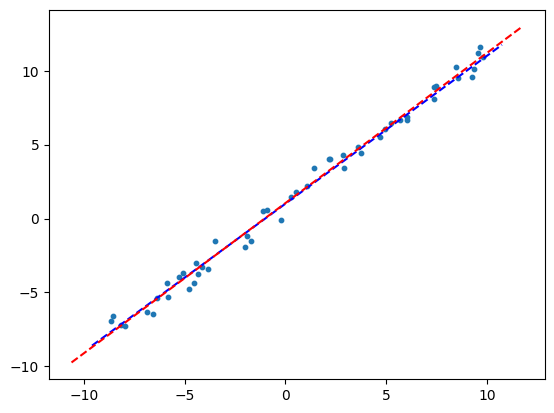

In [34]:
X1 = [i[1] for i in data]
Y  = [i[2] for i in data]
plt.scatter(X1,Y, s = 10)

abline(f_w1,f_w0)
abline(w[1],w[0], color='r')
plt.show()

In [18]:
Y_pred = np.matmul(X, w)
np.sum(np.square(Y_pred-Y))

15.446501024077579

In [19]:
w_other = [3, 2]
Y_other = np.matmul(X, w_other)
np.sum(np.square(Y_other-Y))

1933.5122933147472

What about the test data set?

In [20]:
#50 test samples
testdata = generate_lr(50, f_w0, f_w1)
X_test = [[i[0], i[1]] for i in testdata]
Y_test  = [i[2] for i in testdata]
Y_pred_test = np.matmul(X_test, w)
np.sum(np.square(Y_pred_test-Y_test))

18.409147369150844

In [21]:
Y_pred_test_target = np.matmul(X_test, [1, 1])
np.sum(np.square(Y_pred_test_target-Y_test))

18.25215386756195

In [41]:
def regularized_linear_regression(X, Y, lambda_val):
    N, d = X.shape
    I = np.identity(d)
    X_transpose = np.transpose(X)
    XtX = np.matmul(X_transpose, X)
    lambdaI = np.multiply(lambda_val, I)
    XtX_plus_lambdaI = np.add(XtX, lambdaI)
    inverse_term = np.linalg.inv(XtX_plus_lambdaI)
    inverse_Xt = np.matmul(inverse_term, X_transpose)
    w = np.matmul(inverse_Xt, Y)

    return w

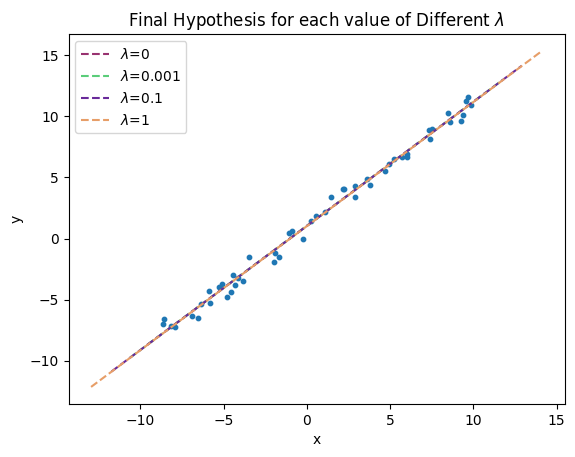

In [196]:
lambda_vals = [0, 0.001, 0.1, 1]

# Extracting X and Y from the 'data' variable
X = np.array([[i[0], i[1]] for i in data])
Y = np.array([i[2] for i in data])

# Plotting the data points
plt.scatter(X[:, 1], Y, s=10)

for lambda_val in lambda_vals:
    w = regularized_linear_regression(X, Y, lambda_val)
    abline(w[1], w[0], label=f"$\lambda$={lambda_val}", color=np.random.rand(3,))
    plt.legend(loc='upper left')

plt.xlabel("x")
plt.ylabel("y")
plt.title("Final Hypothesis for each value of Different $\lambda$")
plt.show()

In [203]:
from sklearn.model_selection import KFold

def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

avg_validation_errors = {}

for lambda_val in lambda_vals:
    validation_errors = []

    for train_index, val_index in kf.split(data):

        X_train, X_val = X[train_index], X[val_index]
        Y_train, Y_val = Y[train_index], Y[val_index]

        w = regularized_linear_regression(X_train, Y_train, lambda_val)
        Y_val_pred = np.matmul(X_val, w)

        error = mean_squared_error(Y_val, Y_val_pred)
        validation_errors.append(error)

    # Average validation error for current lambda
    avg_validation_errors[lambda_val] = np.mean(validation_errors)

# Find the best lambda (that minimizes validation error)
best_lambda = min(avg_validation_errors, key=avg_validation_errors.get)
print(f"The best lambda is: {best_lambda} with an average validation error of: {avg_validation_errors[best_lambda]}")
avg_validation_errors

The best lambda is: 0.1 with an average validation error of: 0.33767461662549547


{0: 0.33768222352909893,
 0.001: 0.33768207855523935,
 0.1: 0.33767461662549547,
 1: 0.3382029639563301}